<h1 style= "color:green; text-align:center"> Web Mining and Applied NLP (44-620) </h1>

<h3 style= "color:orange; font-size:23px"> Web Mining Final Project</h3>

<p style= "color: orange; font-size: 18px"> Sudent Name: Curtis Rogers </p>

<p style= "color:orange; font-size:15px"> Github Repository Link: <a herf= "https://github.com/curt2023/web-mining-final">Web Mining Final Repository</a> </p>

<h3 style= "color:orange; font-size:23px; text-align:center"> Project Overview</h3>

<p> This summer I went to a Metallica concert with my son. This gave me the idea to investigate the lyric sentiments related to the Metallica album "Reload". This is an interesting topic for me because I am not really sure what to expect out of the results. The album should have a wide range of songs with varying sentiments. 

In [39]:
import json
import pickle
import numpy
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt
import math
import pandas as pd
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup
from textblob import TextBlob


First I need to write all of the songs from the album into my notebook

In [4]:
def fetch_song(artist,title,filename):
    URL = f'https://api.lyrics.ovh/v1/{artist}/{title}'
    data = json.loads(requests.get(URL).text)
    with open(filename, 'w') as file:
        json.dump(data, file, indent=5)
    print(f'Saved file {filename}')



#fetch songs

fetch_song('Metallica', 'Fuel', 'Reload_Song_1')
fetch_song('Metallica', 'Better Than You', 'Reload_Song_2')
fetch_song('Metallica', 'Carpe Diem Baby', 'Reload_Song_3')
fetch_song('Metallica', 'Where The Wild Things Are', 'Reload_Song_4')
fetch_song('Metallica', 'Fixxxer', 'Reload_Song_5')
fetch_song('Metallica', 'The Memory Remains', 'Reload_Song_6')
fetch_song('Metallica', 'The Unforgiven II', 'Reload_Song_7')
fetch_song('Metallica', 'Slither', 'Reload_Song_8')
fetch_song('Metallica', 'Bad Seed', 'Reload_Song_9')
fetch_song('Metallica', 'Prince Charming', 'Reload_Song_10')
fetch_song('Metallica', 'Attitude', 'Reload_Song_11')

Saved file Reload_Song_1
Saved file Reload_Song_2
Saved file Reload_Song_3
Saved file Reload_Song_4
Saved file Reload_Song_5
Saved file Reload_Song_6
Saved file Reload_Song_7
Saved file Reload_Song_8
Saved file Reload_Song_9
Saved file Reload_Song_10
Saved file Reload_Song_11


Next I am going to investigate the sentiments related to each song.

In [5]:
def song_sentiment(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
        song = data['lyrics']
    #Loads English Tokenizer
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')

    #Document
    doc = nlp(song)

    #Sentiment analysis
    polarity_score = doc._.polarity

    print()
    print('*****************************************************************')
    print(f'the polarity score for {filename} is {polarity_score}')

#Song sentiment analysis

song_sentiment('Reload_Song_1')
song_sentiment('Reload_Song_2')
song_sentiment('Reload_Song_3')
song_sentiment('Reload_Song_4')
song_sentiment('Reload_Song_5')
song_sentiment('Reload_Song_6')
song_sentiment('Reload_Song_7')
song_sentiment('Reload_Song_8')
song_sentiment('Reload_Song_9')
song_sentiment('Reload_Song_10')
song_sentiment('Reload_Song_11')



*****************************************************************
the polarity score for Reload_Song_1 is 0.007081220061989302

*****************************************************************
the polarity score for Reload_Song_2 is 0.3982456140350877

*****************************************************************
the polarity score for Reload_Song_3 is 0.3517482517482517

*****************************************************************
the polarity score for Reload_Song_4 is 0.13423202614379082

*****************************************************************
the polarity score for Reload_Song_5 is 0.045535714285714284

*****************************************************************
the polarity score for Reload_Song_6 is -0.40271739130434786

*****************************************************************
the polarity score for Reload_Song_7 is -0.20343915343915348

*****************************************************************
the polarity score for Reload_Song_8 is -0

After that I would like to compile some of the variables and data that I am going to use to display the results of this investigation.

In [6]:
import statistics

all_scores = [0.007081220061989302,0.3982456140350877,0.3517482517482517,0.13423202614379082,0.045535714285714284,-0.40271739130434786,-0.20343915343915348,-0.2884126984126984,-0.3839826839826839,0.040977443609022564,-0.017361111111111112]


average_sentimate = statistics.mean(all_scores)
deviation= statistics.stdev(all_scores)
pos_deviation=[0.2411646408400981]
neg_deviation=[-0.29899968963394147]




song_list = ["Fuel","Better Than You","Carpe Diem Baby","Where The Wild Things Are","Fixxxer","The Memory Remains",
             "The Unforgiven II", "Slither","Bad Seed","Prince Charming","Attitude"]
positions=[1,2,3,4,5,6,7,8,9,10,11]







Below is the graph that was created to show the sentiment of each song along with the mean and standard deviations of the album.

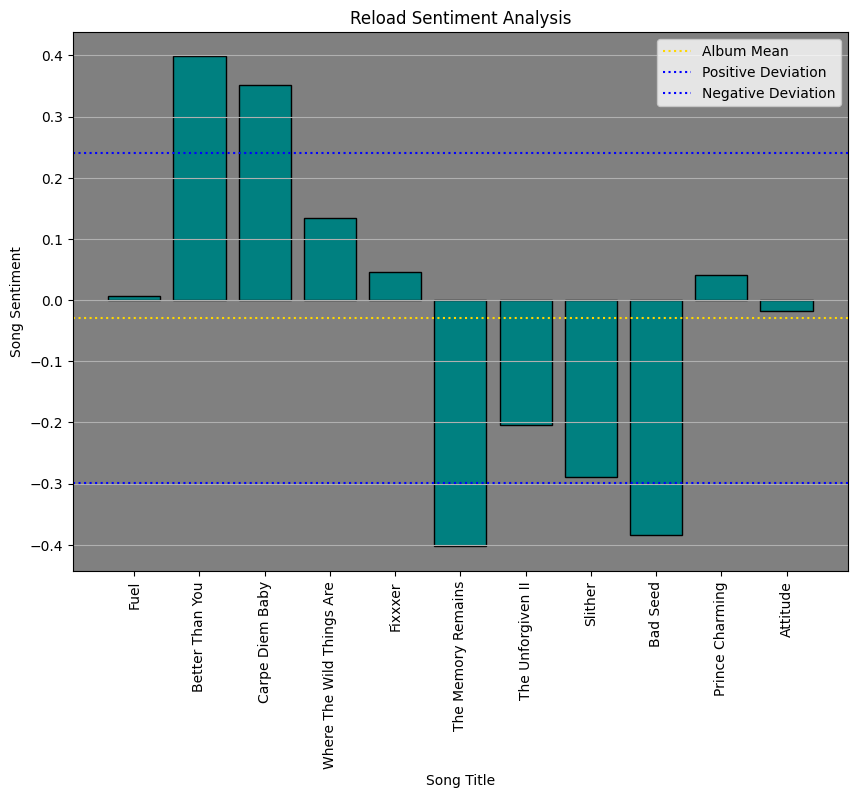

In [7]:

plt.figure(figsize=(10,7))
plt.title("Reload Sentiment Analysis")
plt.xlabel("Song Title")
plt.grid(axis="y")
plt.ylabel("Song Sentiment")
plt.bar(positions,all_scores, width=0.8, color="teal",edgecolor="black")
plt.gca().set_facecolor('gray')
plt.axhline(average_sentimate,color="gold",ls="dotted")
plt.axhline(pos_deviation,color="blue",ls="dotted")
plt.axhline(neg_deviation,color="blue",ls="dotted")
plt.xticks(positions,song_list,rotation='vertical')
plt.legend(['Album Mean','Positive Deviation','Negative Deviation'])
plt.show()

Question 1: Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course. Get the html for the article and store it in a file (which you must submit with your project)

In [34]:
url= "https://www.kerrang.com/a-plea-for-metallicas-reload"

r=requests.get(url)
html=r.content

soup= BeautifulSoup(html,"html.parser")
article_text= soup.find_all('div', class_='html-output')


with open("article.html","w", encoding='utf-8') as file:
   file.write(str(article_text))



Question 2: Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use .get_text()). Print the polarity score with an appropriate label. Additionally print the number of sentences in the original article (with an appropriate label)

In [42]:
with open ('article.html',"r", encoding='utf-8') as file:
    article1=file.read()
    
soup = BeautifulSoup(article1, "html.parser")
text = soup.get_text()

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

article = nlp(text)

    #Sentiment analysis
article_polarity_score = article._.polarity

blob= TextBlob(text)
sentences = blob.sentences
sentence_count = len(sentences)
print(text)
print()
print("***********************************************************************************************")
print()
print(f'Polarity Score: {article_polarity_score}')
print(f'Number of Sentences: {sentence_count}')



[Metallica’s Reload is the first album I ever bought with my own money. I was 12, I’d seen the Memory Remains video, and I’d saved up some allowance. To me, a kid whose previous dalliances into hard rock had been NIN and The Offspring, this album seemed awesome. It was bikerish and butch and a little stupid but in a fun way. I listened to it constantly and memorized all the lyrics.I was excited to get into this thing called 'metal'.
But upon meeting other, more entrenched metal kids, I quickly learned that I was wrong: Reload, in fact, sucked. It was a black mark on Metallica’s record, or rather part of the black mark that we were all living through at the time. To like that album was the metalhead equivalent of having a soul patch., In retrospect, I understand where those dudes were coming from (I mean, look at James' hair in that video). The Load/Reload era is rough times for Metallica fans, and the band didn’t make it any easier for us. To their credit, the ’90s was a weird era for 

Question 3: Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels)

In [43]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
words = [token.text.lower()
     for token in doc
     if token.is_alpha and token.text.lower() not in STOP_WORDS]
token_count = Counter(words)

common_tokens = token_count.most_common(5)
print(common_tokens)

print()
print("-----------------------------------------------------------------------------")
print()

print("All words and their frequencies")
for words, frequency in token_count.items():
    print(f"{words}: {frequency}")

[('metallica', 12), ('reload', 12), ('album', 11), ('metal', 6), ('songs', 6)]

-----------------------------------------------------------------------------

All words and their frequencies
metallica: 12
reload: 12
album: 11
bought: 1
money: 1
seen: 1
memory: 2
remains: 2
video: 4
saved: 1
allowance: 1
kid: 1
previous: 1
dalliances: 1
hard: 1
rock: 4
nin: 1
offspring: 1
awesome: 2
bikerish: 1
butch: 1
little: 2
stupid: 1
fun: 2
way: 1
listened: 1
constantly: 1
memorized: 1
lyrics: 2
excited: 1
thing: 1
called: 1
metal: 6
meeting: 1
entrenched: 1
kids: 1
quickly: 1
learned: 1
wrong: 1
fact: 1
sucked: 1
black: 2
mark: 2
record: 5
living: 1
time: 5
like: 5
metalhead: 1
equivalent: 1
having: 1
soul: 1
patch: 1
retrospect: 1
understand: 1
dudes: 2
coming: 1
mean: 2
look: 1
james: 2
hair: 1
load: 5
era: 2
rough: 1
times: 1
fans: 1
band: 5
easier: 1
credit: 1
weird: 4
art: 1
fashion: 1
garish: 1
thrashers: 1
suddenly: 1
expected: 1
play: 1
rich: 1
stars: 1
shades: 1
beards: 1
untucked: 1
col

Question 4: Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels).

In [44]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
lemmas = [token.lemma_.lower()
     for token in doc
     if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]
lemma_count = Counter(lemmas)

common_lemmas = lemma_count.most_common(5)
print(common_lemmas)

print()
print("-----------------------------------------------------------------------------")
print()

print("All words and their frequencies")
for lemmas, frequency in lemma_count.items():
    print(f"{lemmas}: {frequency}")

[('metallica', 12), ('reload', 12), ('album', 12), ('song', 8), ('band', 7)]

-----------------------------------------------------------------------------

All words and their frequencies
metallica: 12
reload: 12
album: 12
buy: 1
money: 1
memory: 2
remain: 1
video: 4
save: 1
allowance: 1
kid: 2
previous: 1
dalliance: 1
hard: 1
rock: 4
nin: 1
offspring: 1
awesome: 2
bikerish: 1
butch: 1
little: 2
stupid: 1
fun: 2
way: 1
listen: 1
constantly: 1
memorize: 1
lyric: 3
excited: 1
thing: 1
metal: 6
meet: 1
entrenched: 1
quickly: 1
learn: 1
wrong: 1
fact: 1
suck: 1
black: 2
mark: 2
record: 5
live: 1
time: 6
like: 5
metalhead: 1
equivalent: 1
soul: 1
patch: 1
retrospect: 1
understand: 1
dude: 3
come: 1
mean: 3
look: 1
james: 2
hair: 1
load: 6
era: 2
rough: 1
fan: 1
band: 7
easy: 1
credit: 1
weird: 4
art: 1
fashion: 1
garish: 1
thrasher: 1
suddenly: 1
expect: 1
play: 1
rich: 1
star: 1
shade: 1
beard: 1
untucked: 1
collared: 1
shirt: 1
goth: 2
gnome: 1
sleep: 2
okay: 1
mistake: 1
mind: 1
stand: 

Question 5: Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

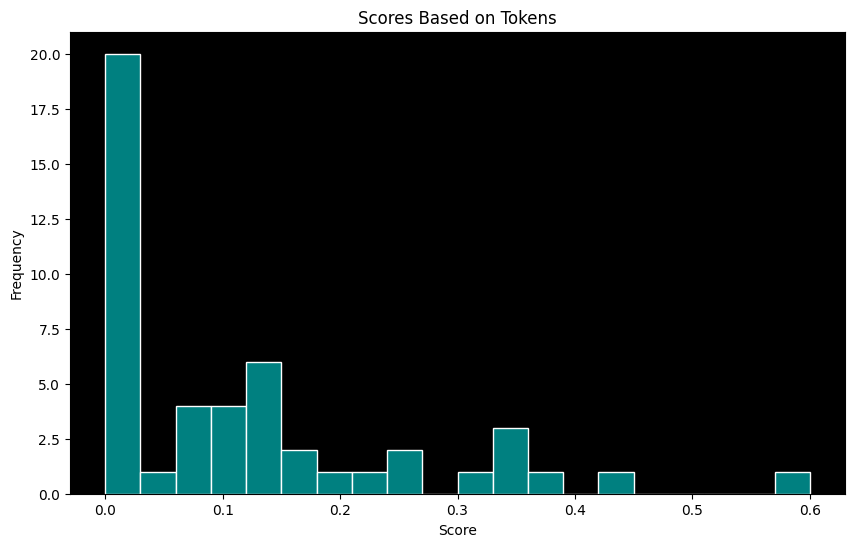

In [46]:
def score_sentence_by_token(sentence, interesting_token):
    doc = nlp(sentence)
    tokens = [token.text.lower()
     for token in doc
     if token.is_alpha and token.text.lower() not in STOP_WORDS]
    score = sum(token in interesting_token for token in tokens)/len(tokens)
    return score


interesting_tokens = ['metallica','album', 'reload', 'metal', 'songs']
doc = nlp(text)

sentence_scores = [score_sentence_by_token(sentence.text, interesting_tokens) for sentence in doc.sents]



#histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='teal', edgecolor='white')
plt.gca().set_facecolor('black')
plt.title('Scores Based on Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Question 6: Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

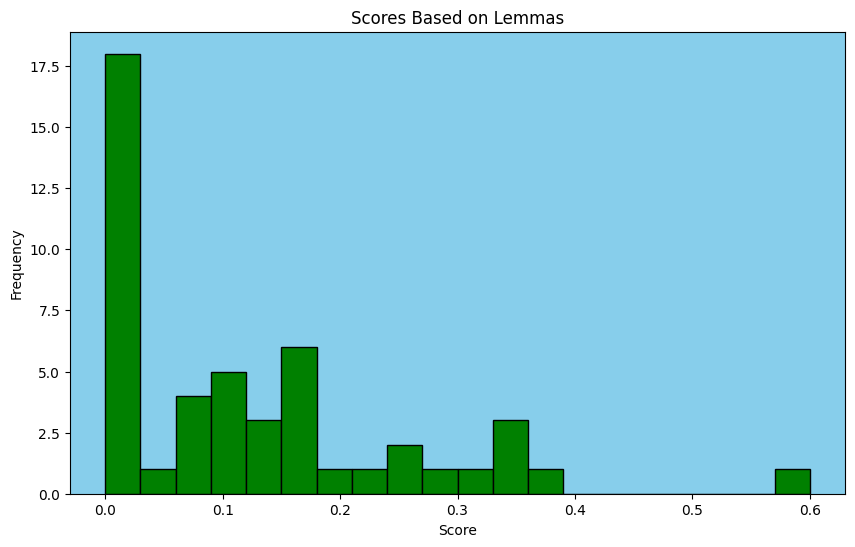

In [47]:
def score_sentence_by_lemma(sentence, interesting_lemma):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower()
     for token in doc
     if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]
    score = sum(token in interesting_lemma for token in lemmas)/len(lemmas)
    return score

interesting_lemmas =  ['metallica','album', 'reload', 'song', 'band']

doc = nlp(text)



lemma_scores = [score_sentence_by_lemma(sentence.text, interesting_lemmas) for sentence in doc.sents]



#histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='green', edgecolor='black')
plt.gca().set_facecolor('skyblue')
plt.title('Scores Based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Question 7: Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score. Record the scores in this Markdown cell

Cutoff Score (tokens):.25


Cutoff Score (lemmas):.2

Feel free to change these scores as you generate your summaries. Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Question 8: Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [58]:
cutoff_score = 0.25

summary_sentences = []

for sentence in sentences:
    token_score = score_sentence_by_token(str(sentence), interesting_tokens)
    if token_score > cutoff_score:
        summary_sentences.append(str(sentence))


formatted_sentences = [sentence.strip() for sentence in summary_sentences]
formatted_summary = " ".join(formatted_sentences)
formatted_summary = " ".join(formatted_summary.split())

summary=formatted_sentences

print(summary)

['[Metallica’s Reload is the first album I ever bought with my own money.', 'But with all that in mind, I stand by Reload.', 'But Reload goes all-in, as though by breaking the seal on the last album, Metallica were now free to write what they really wanted to.', ", Again, all of these songs would be considered metal milestones if they weren't by Metallica.", "Maybe that’s the problem – Reload is by Metallica, extreme metal's chosen sons.", 'Who knows, you might discover it’s actually your favorite Metallica album!', 'But you’ll never know until you give it a chance.Read this next:The 20 greatest Metallica songs – ranked10 musicians who became world-famous overnightEvery Metallica album ranked from worst to best]']


Question 9 :Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [61]:
summary_blob = TextBlob(str(summary))
summary_polarity_score = summary_blob.sentiment.polarity

count_summary_sentences = len(summary)



print(f'Summary Polarity Score: {summary_polarity_score}')
print(f'Number of Sentences: {count_summary_sentences}')

Summary Polarity Score: 0.2681818181818182
Number of Sentences: 7


Question 10: Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [62]:
cutoff_score = 0.2

summary_sentences = []

for sentence in sentences:
    token_score = score_sentence_by_lemma(str(sentence), interesting_lemmas)
    if token_score > cutoff_score:
        summary_sentences.append(str(sentence))


formatted_sentences = [sentence.strip() for sentence in summary_sentences]
formatted_summary = " ".join(formatted_sentences)
formatted_summary = " ".join(formatted_summary.split())

lemma_summary=formatted_sentences

print(lemma_summary)

['[Metallica’s Reload is the first album I ever bought with my own money.', 'The Load/Reload era is rough times for Metallica fans, and the band didn’t make it any easier for us.', 'But with all that in mind, I stand by Reload.', 'But Reload goes all-in, as though by breaking the seal on the last album, Metallica were now free to write what they really wanted to.', ", Again, all of these songs would be considered metal milestones if they weren't by Metallica.", "Maybe that’s the problem – Reload is by Metallica, extreme metal's chosen sons.", 'Maybe we need to organize a Reload tribute album, where young bands take on these killer tracks and remind everyone what good songs they were without the loaded connotation of the greatest metal band of all time (if you have an especially cool Reload cover idea, let us know in the Facebook comments).', 'In closing, today I urge you: forget about what Metallica means, and give Reload a spin.', 'Who knows, you might discover it’s actually your favo

Question 11: Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [63]:
summary_blob = TextBlob(str(lemma_summary))
lemma_polarity_score = summary_blob.sentiment.polarity

lemma_summary_sentences = len(summary)



print(f'Summary Polarity Score: {lemma_polarity_score}')
print(f'Number of Sentences: {lemma_summary_sentences}')

Summary Polarity Score: 0.334375
Number of Sentences: 7


Question 12 Answer:

There is a pretty big difference between my full article polarity and the summaries polarity. 

full article polarity =  0.09460870844365987 with 45 sentences
token summary polarity = 0.26 with 7 sentences
lemma summary polarity = 0.33 with 7 sentences

I believe that this large change occured because the summary removed a lot of the filler sentences, and allowed to polarity to focus on the important parts of the text. From reading both summaries and the article I feel that the summaries do a good job extracting the main points of the article. Even though the lemma summary does a little better.

Question 13 Answer

Based on your reading of the original article, which summary do you think is better (if there's a difference). Why do you think this might be?

I answered this a little above. I think that the lemma summary did a better job a summerizing the article. Both only had 7 sentences and were very very similar, but in the end I feel that the lemma summary was the best.

In [65]:
!jupyter nbconvert --to html web-mining-final-nlp.ipynb

[NbConvertApp] Converting notebook web-mining-final-nlp.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 472061 bytes to web-mining-final-nlp.html
